In [3]:
words = open('/content/names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min(len(w) for w in words) # Minimum length of any word

2

In [7]:
max(len(w) for w in words)

15

In [20]:
# Bigram -> pair of consecutive two letters/words/characters

for w in words[:1]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a


In [21]:
w

'emma'

In [10]:
w[1:]

'mma'

In [15]:
# Pairs 'e' with 'm' , 'm' with 'm' , 'm' with 'a'.
# To count the pair in which these pairs comes in a words we will use a dictionary
b = {} # Intializing a dictionary
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>'] # <S> and <E> are the tokens used to mark the starting and ending of a word
  for ch1, ch2 in zip(chs, chs[1:]): # Pairing each character with its nearer character
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1 # Counting the bigrams, returns '0' if its the first time and add up if there exists that bigram already
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [13]:
print(chs)

['<S>', 'a', 'v', 'a', '<E>']


In [16]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [25]:
# Its counting how many times the combination of bigrams is occuring
# In above, 'a' is an ending character 3 times and every other pair occured only 1 time
# Now for all the words in the names.txt dataset
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
# b

In [24]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True) # Getting the bigram with highest frequency (most likely to occur)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

 Here 'n' as an ending character is most likely to occur in the name's dataset


**Now we will use 2D array instead of python dictionary for the bigram representation. We will use PyTorch**

In [26]:
import torch

In [30]:
# Creating an array intialized all elements with '0'
a = torch.zeros((3,5), dtype = torch.int32)

In [33]:
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [32]:
a.dtype

torch.int32

In [36]:
# Creating an array of size 28x28 to store all alphabets + <S> and <E> tokens
N = torch.zeros((28,28), dtype = torch.int32)

In [40]:
chars = sorted(list(set(''.join(words)))) # Joining all names of dataset as a single a single string and creating a set out of it
# Since set doesn't allow duplicate items it will remove any duplicate characters
# chars # Here, chars consists all the alphabets (unique) from the names dataset

In [63]:
# Now we will map each of the alphabet/character to the corresponding integer value for INDEXING later on.
stoi = {s:i for i,s in enumerate(chars)} # Enumerate function pairs object(character in this case) with index (0,1,2......)4
# We have to manually set the index of <S> and <E> tokens as they are not in the names but just an indentifiers
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [65]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    # Mapping ch1 and ch2 to their integers from the above lookup table 'stoi' (s to i)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [45]:
# Now we will visualize the above array of characters count
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
itos = {i:s for s,i in stoi.items()} # Inverse of stoi

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

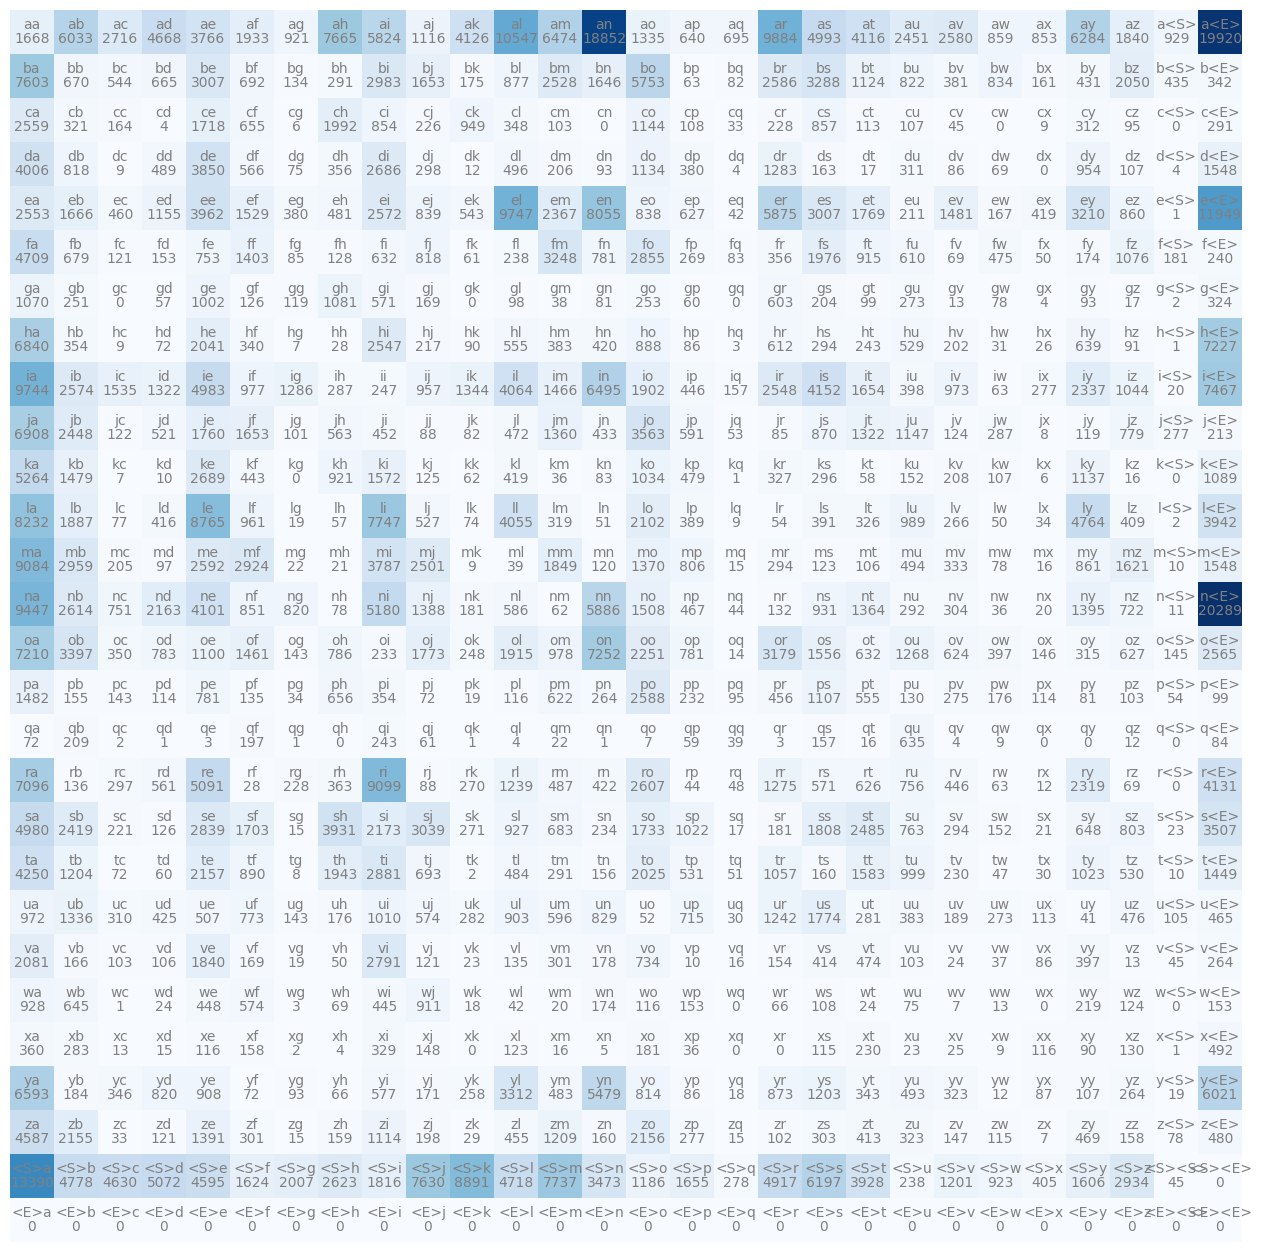

In [68]:
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
# Iterating over all the cells
for i in range(28):
  for j in range(28):
    chstr = itos[i] + itos[j] # chstr = aa, ab, ac ,......etc
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
    plt.text
plt.axis('off')

In [ ]:
# Above plot shows the all the combination with number of times it occured as bigram in the names dataset
# But there is a problem in the above representation as we can see in last row and second last column

* The problem is that there wont be a pair with character after ending
and there also wont be a pair with character before starting of any word
So all the values are '0'.

* As you can see above in the bigrams list 'S' will always be at start and 'E' will always be at end

So instead of having two tokens we will only have single token named '.'

In [69]:
# Here '.' will be in 0th index/ or first character and we will ofset all other characters by 1
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [70]:
itos = {i:s for s,i in stoi.items()}

In [72]:
N = torch.zeros((28,28), dtype = torch.int32) # Make sure to start the array with all values '0' before incrementing

In [73]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    # Mapping ch1 and ch2 to their integers from the above lookup table 'stoi' (s to i)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

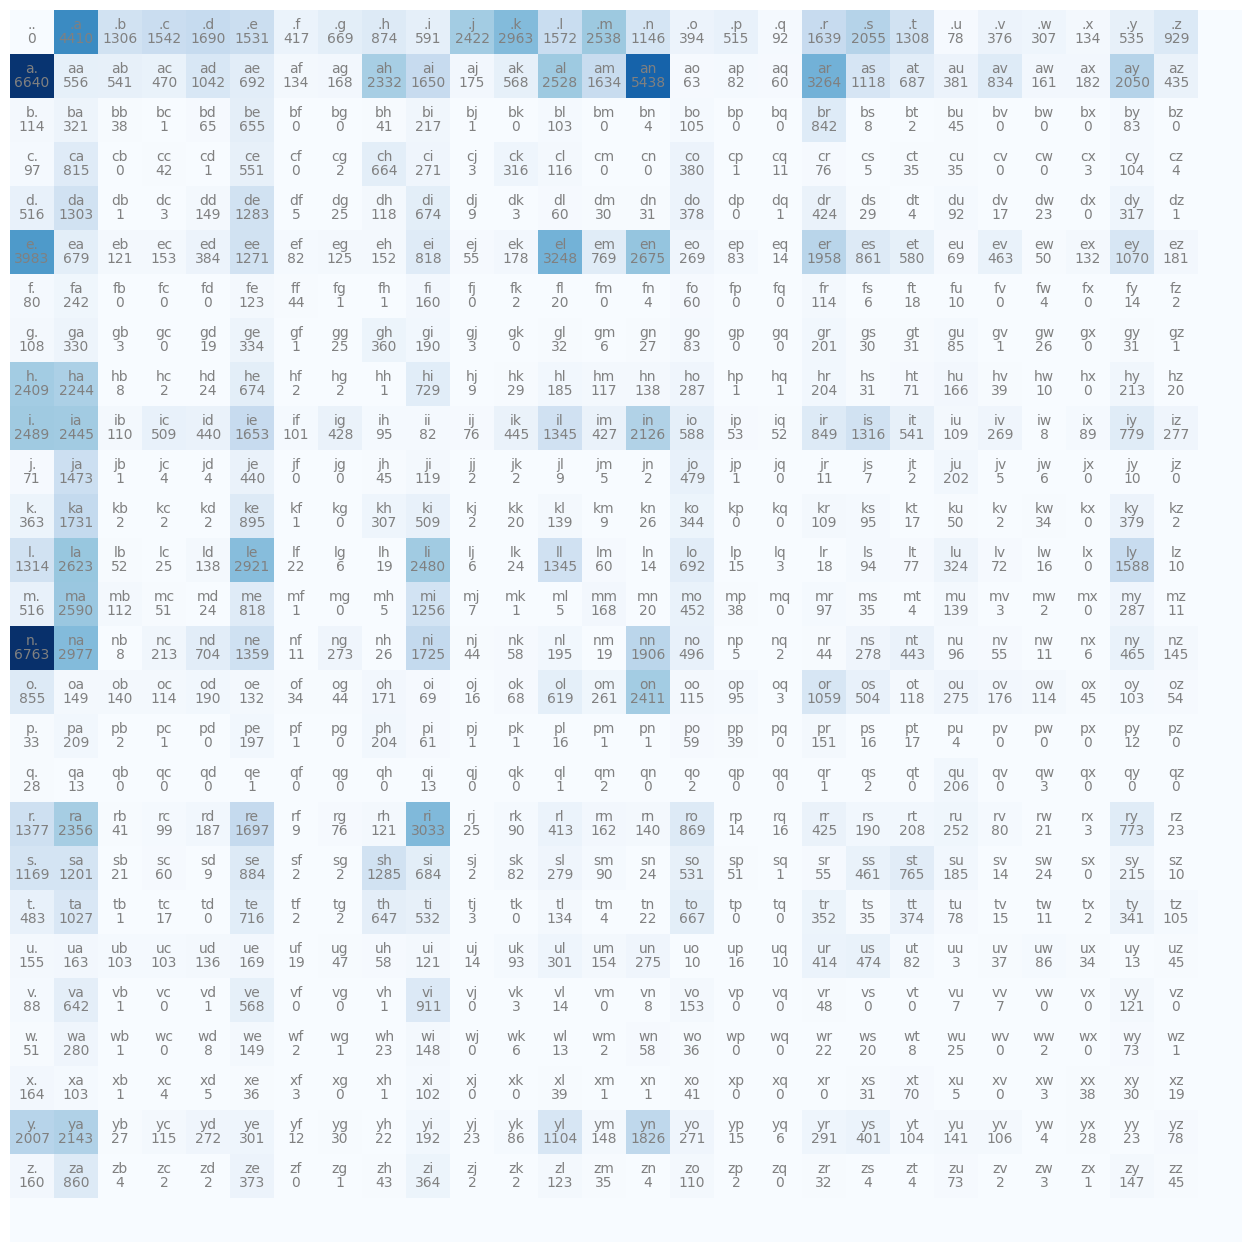

In [74]:
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
# Iterating over all the cells
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j] # chstr = aa, ab, ac ,......etc
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off')